In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [48]:
# Import data


df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [49]:
# Add 'overweight' column
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
df['overweight'] = (df['BMI'] > 25).astype(int)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


In [50]:
### Normalize data by making 0 always good and 1 always bad. 

# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['gluc'] == 1, 'gluc'] = 0

# If the value is more than 1, make the value 1.
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1
df.loc[df['gluc'] > 1, 'gluc'] = 1

In [51]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0


In [52]:
# Draw Categorical Plot
# def draw_cat_plot():

# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(cp, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


In [74]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature
# You will have to rename one of the columns for the catplot to work correctly
to_plot = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).value_counts()
to_plot = to_plot.rename(columns={'count': 'total'})
to_plot.head()

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330


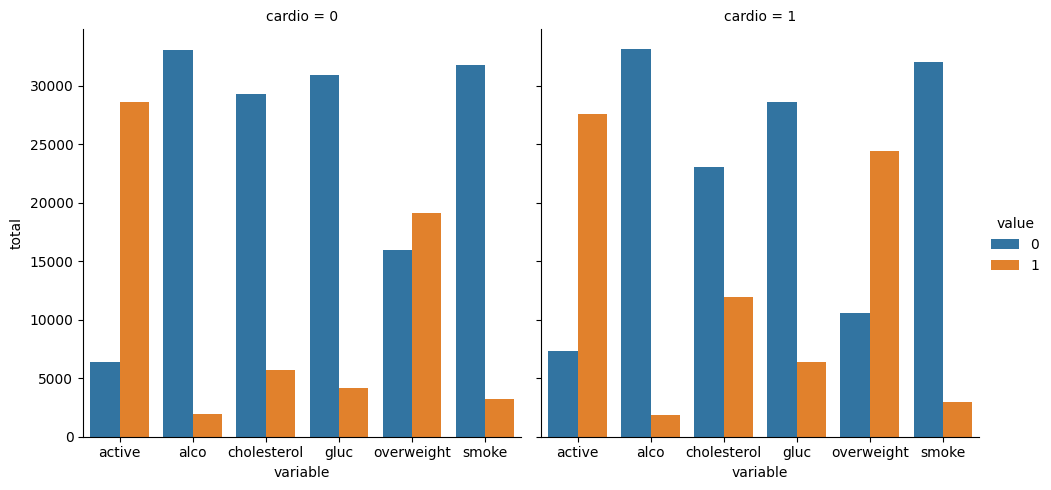

In [77]:
# Draw the catplot with 'sns.catplot()'
fig = sns.catplot(data=to_plot, x='variable', y='total', kind='bar', col='cardio', hue='value')

In [78]:
# Do not modify the next two lines
fig.savefig('catplot.png')
# return fig

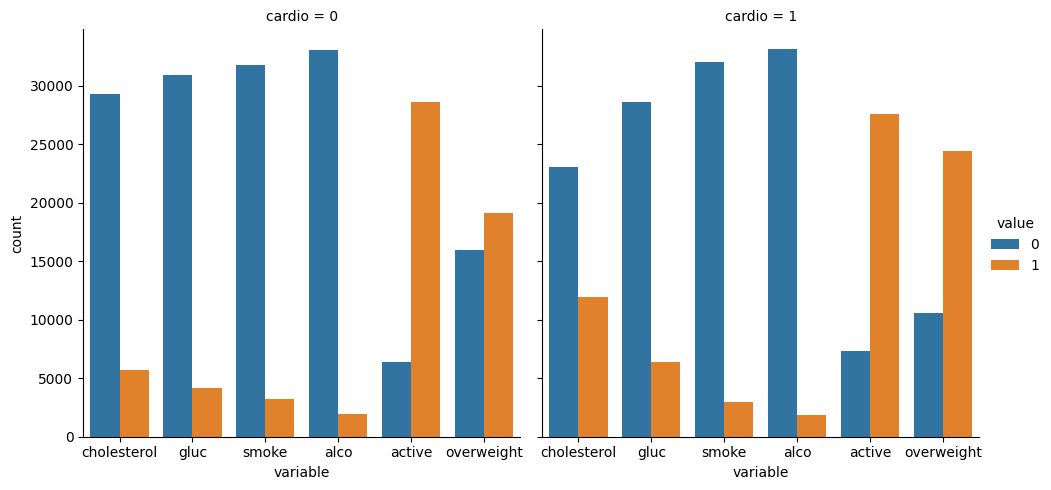

In [45]:
sb.catplot(data=cp2, x='variable', kind='count', col='cardio', hue='value')

In [80]:
# Draw Heat Map
# def draw_heat_map():

# Clean the data
# diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
pressure_mask = df['ap_lo'] <= df['ap_hi']
pressure_mask.value_counts()

True     68766
False     1234
dtype: int64

In [83]:
# height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
# height is more than the 97.5th percentile
height_mask = (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975))
height_mask.value_counts()

True     67024
False     2976
Name: height, dtype: int64

In [87]:
# weight is less than the 2.5th percentile
# weight is more than the 97.5th percentile
weight_mask = (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))
weight_mask.value_counts()

True     66897
False     3103
Name: weight, dtype: int64

In [89]:
df.shape

(70000, 15)

In [90]:
df_heat = df[pressure_mask & height_mask & weight_mask]
df_heat.shape

(63259, 15)

In [92]:
# Calculate the correlation matrix
corr = df_heat.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000025,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.110267,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.135588,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.266305,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.862657,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.024925,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.216786,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.167416,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.121930,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.041652,-0.003274


[Creating a triangle heatmap using a mask](https://www.geeksforgeeks.org/how-to-create-a-triangle-correlation-heatmap-in-seaborn-python/)

In [96]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr))

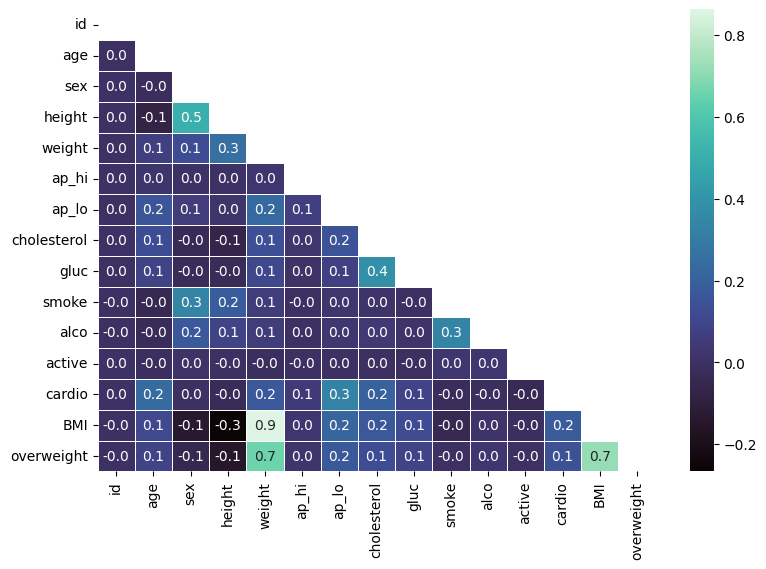

In [111]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(9,6))

# Draw the heatmap with 'sns.heatmap()'
ax = sns.heatmap(corr, mask=mask, linewidths=0.5, annot=True, fmt='.1f', cmap='mako')

In [112]:
# Do not modify the next two lines
fig.savefig('heatmap.png')
# return fig